COLUMNS TO IGNORE:
date
view
sqft_above
sqft_basement
yr_renovated
address
lat
long

# Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
data = pd.read_csv('data/kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


In [3]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [4]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

## Handling missing values

In [5]:
# checking sum of null values
data.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [6]:
# dropping rows with null values
data.dropna(subset=['heat_source', 'sewer_system'], inplace=True)
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
dtype: int64

In [7]:
# encoding categorical data
data = pd.get_dummies(data, columns=['waterfront', 'nuisance', 'greenbelt', 'condition', 'grade', 'heat_source', 'sewer_system'], drop_first=True)
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'view', 'sqft_above', 'sqft_basement',
       'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'address',
       'lat', 'long', 'waterfront_YES', 'nuisance_YES', 'greenbelt_YES',
       'condition_Fair', 'condition_Good', 'condition_Poor',
       'condition_Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_2 Substandard', 'grade_3 Poor',
       'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
       'grade_8 Good', 'grade_9 Better', 'heat_source_Electricity/Solar',
       'heat_source_Gas', 'heat_source_Gas/Solar', 'heat_source_Oil',
       'heat_source_Oil/Solar', 'heat_source_Other',
       'sewer_system_PRIVATE RESTRICTED', 'sewer_system_PUBLIC',
       'sewer_system_PUBLIC RESTRICTED'],
      dtype='object')

## Feature engineering

In [8]:
# Convert the 'date' column to a datetime object
data['date'] = pd.to_datetime(data['date'])

# Create separate columns for 'month', 'year', and 'day'
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data['day'] = data['date'].dt.day

# Create binary features for seasons using 'month' column
data['season_winter'] = data['month'].apply(lambda x: 1 if x in [12, 1, 2] else 0)
data['season_spring'] = data['month'].apply(lambda x: 1 if x in [3, 4, 5] else 0)
data['season_summer'] = data['month'].apply(lambda x: 1 if x in [6, 7, 8] else 0)
data['season_fall'] = data['month'].apply(lambda x: 1 if x in [9, 10, 11] else 0)

data = data.drop(['month', 'year', 'day', 'date'], axis=1)

In [9]:
# dropping unnecessary columns

data = data.drop(['id', 'address', 'lat', 'long', 'view', 'sqft_above', 'sqft_basement'], axis=1)

In [10]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated',
       'waterfront_YES', 'nuisance_YES', 'greenbelt_YES', 'condition_Fair',
       'condition_Good', 'condition_Poor', 'condition_Very Good',
       'grade_11 Excellent', 'grade_12 Luxury', 'grade_13 Mansion',
       'grade_2 Substandard', 'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair',
       'grade_6 Low Average', 'grade_7 Average', 'grade_8 Good',
       'grade_9 Better', 'heat_source_Electricity/Solar', 'heat_source_Gas',
       'heat_source_Gas/Solar', 'heat_source_Oil', 'heat_source_Oil/Solar',
       'heat_source_Other', 'sewer_system_PRIVATE RESTRICTED',
       'sewer_system_PUBLIC', 'sewer_system_PUBLIC RESTRICTED',
       'season_winter', 'season_spring', 'season_summer', 'season_fall'],
      dtype='object')

In [11]:
data = data.astype('float64')

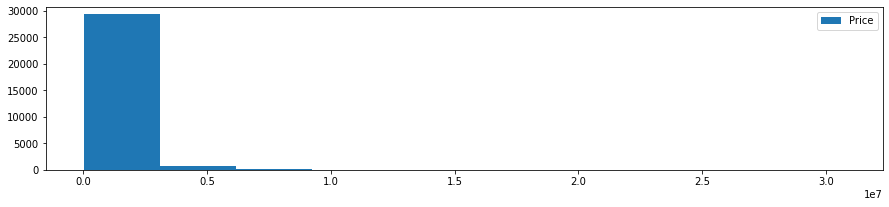

In [12]:
# Plotting distribution of target 'price'
y = data['price']
fig, ax = plt.subplots(figsize=(15,3))
ax.hist(y, label="Price")
ax.legend();

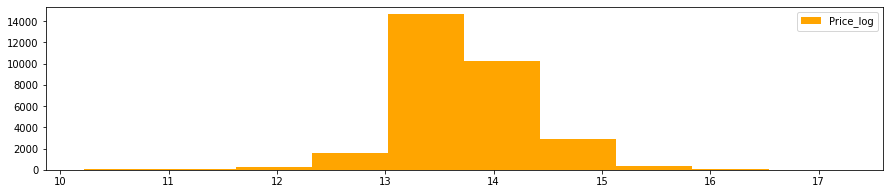

In [13]:
# comparing distribution of target to log-transformed version of target
y_log = np.log(y)
y_log.name = "price_log"
y_log

# Plotting distributions of target vs. log-transformed target values
fig, ax = plt.subplots(figsize=(15,3))
ax.hist(y_log, color="orange", label="Price_log")
ax.legend();

In [14]:
data['price_log'] = np.log(data['price'])

In [15]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated',
       'waterfront_YES', 'nuisance_YES', 'greenbelt_YES', 'condition_Fair',
       'condition_Good', 'condition_Poor', 'condition_Very Good',
       'grade_11 Excellent', 'grade_12 Luxury', 'grade_13 Mansion',
       'grade_2 Substandard', 'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair',
       'grade_6 Low Average', 'grade_7 Average', 'grade_8 Good',
       'grade_9 Better', 'heat_source_Electricity/Solar', 'heat_source_Gas',
       'heat_source_Gas/Solar', 'heat_source_Oil', 'heat_source_Oil/Solar',
       'heat_source_Other', 'sewer_system_PRIVATE RESTRICTED',
       'sewer_system_PUBLIC', 'sewer_system_PUBLIC RESTRICTED',
       'season_winter', 'season_spring', 'season_summer', 'season_fall',
       'price_log'],
      dtype='object')

In [16]:
print(data.yr_built.value_counts())
print(data['yr_built'].min())
print(data['yr_built'].max())

2021.0    1700
1968.0     514
2020.0     504
1978.0     493
1977.0     484
          ... 
1901.0      39
1934.0      38
1935.0      38
1902.0      36
1933.0      30
Name: yr_built, Length: 123, dtype: int64
1900.0
2022.0


In [17]:
# Convert 'yr_built' to a categorical feature 'decade_built'
data['decade_built'] = pd.cut(data['yr_built'], bins=range(1900, 2030, 10), labels=False)

# Create new encoded categorical features based on 'decade_built'
encoded_decades = pd.get_dummies(data['decade_built'], prefix='decade', drop_first=True)

# Add the new features to the original dataset
data = pd.concat([data, encoded_decades], axis=1)

# Drop the original 'yr_built' and 'decade_built' columns
data = data.drop(['yr_built', 'decade_built'], axis=1)


In [18]:
# Convert 'yr_built' to a categorical feature 'decade_built'
data['ren_decade'] = pd.cut(data['yr_renovated'], bins=range(1900, 2030, 10), labels=False)

# Create new encoded categorical features based on 'decade_built'
encoded_ren = pd.get_dummies(data['ren_decade'], prefix='ren', drop_first=True)

# Add the new features to the original dataset
data = pd.concat([data, encoded_ren], axis=1)

# Drop the original 'yr_built' and 'decade_built' columns
data = data.drop(['yr_renovated', 'ren_decade'], axis=1)


In [19]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_garage', 'sqft_patio', 'waterfront_YES', 'nuisance_YES',
       'greenbelt_YES', 'condition_Fair', 'condition_Good', 'condition_Poor',
       'condition_Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_2 Substandard', 'grade_3 Poor',
       'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
       'grade_8 Good', 'grade_9 Better', 'heat_source_Electricity/Solar',
       'heat_source_Gas', 'heat_source_Gas/Solar', 'heat_source_Oil',
       'heat_source_Oil/Solar', 'heat_source_Other',
       'sewer_system_PRIVATE RESTRICTED', 'sewer_system_PUBLIC',
       'sewer_system_PUBLIC RESTRICTED', 'season_winter', 'season_spring',
       'season_summer', 'season_fall', 'price_log', 'decade_1.0', 'decade_2.0',
       'decade_3.0', 'decade_4.0', 'decade_5.0', 'decade_6.0', 'decade_7.0',
       'decade_8.0', 'decade_9.0', 'decade_10.0', 'decade_11.0'

In [20]:
# creating a correlation matrix with all features with respect to 'price_log' 
corr_with_price = data.corr()['price_log'].sort_values(ascending=False)
print(corr_with_price)


price_log                          1.000000
price                              0.829938
sqft_living                        0.621995
bathrooms                          0.516579
bedrooms                           0.345886
sqft_patio                         0.310324
sqft_garage                        0.284627
grade_9 Better                     0.283096
grade_11 Excellent                 0.243749
floors                             0.234263
heat_source_Gas                    0.183354
grade_12 Luxury                    0.167870
waterfront_YES                     0.138596
season_spring                      0.116902
decade_11.0                        0.103730
greenbelt_YES                      0.097182
grade_13 Mansion                   0.086235
sqft_lot                           0.084701
ren_10.0                           0.070119
grade_8 Good                       0.068209
decade_9.0                         0.058323
decade_10.0                        0.055129
ren_9.0                         

<Axes: xlabel='sqft_living', ylabel='price_log'>

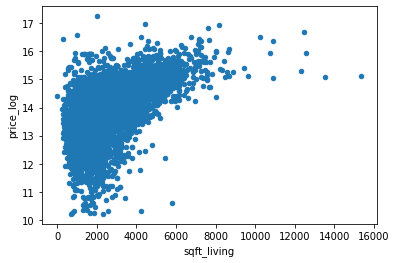

In [21]:
# Creating scatterplot of most correlated feature (sqft_living) vs price to visualize relationship
data.plot.scatter(x='sqft_living', y='price_log')

In [22]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_garage', 'sqft_patio', 'waterfront_YES', 'nuisance_YES',
       'greenbelt_YES', 'condition_Fair', 'condition_Good', 'condition_Poor',
       'condition_Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_2 Substandard', 'grade_3 Poor',
       'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
       'grade_8 Good', 'grade_9 Better', 'heat_source_Electricity/Solar',
       'heat_source_Gas', 'heat_source_Gas/Solar', 'heat_source_Oil',
       'heat_source_Oil/Solar', 'heat_source_Other',
       'sewer_system_PRIVATE RESTRICTED', 'sewer_system_PUBLIC',
       'sewer_system_PUBLIC RESTRICTED', 'season_winter', 'season_spring',
       'season_summer', 'season_fall', 'price_log', 'decade_1.0', 'decade_2.0',
       'decade_3.0', 'decade_4.0', 'decade_5.0', 'decade_6.0', 'decade_7.0',
       'decade_8.0', 'decade_9.0', 'decade_10.0', 'decade_11.0'

## Baseline model (simple regression)

In [23]:
y_log = data['price_log']
x_baseline = data[['sqft_living']]

baseline_model = sm.OLS(y_log, sm.add_constant(x_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                 1.900e+04
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        22:52:36   Log-Likelihood:                -19063.
No. Observations:               30111   AIC:                         3.813e+04
Df Residuals:                   30109   BIC:                         3.815e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.9496      0.006   2062.757      

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


The coefficient for the 'sqft_living' predictor is 0.0004. This means that for every additional square foot of living area, the natural logarithm of the housing price increases by 0.0004 units, all else being equal.
The intercept or constant term is 12.9496. This is the predicted value of the natural logarithm of the housing price when the square footage of living area is zero. However, this value doesn't have any meaningful interpretation in this context, since a house with zero square footage of living area doesn't exist.
The R-squared value is 0.387, which means that the predictor 'sqft_living' explains about 39% of the variation in the natural logarithm of the housing prices. This suggests that there may be other important predictors that are not included in the model.
The F-statistic is 1.9e+04, and the associated p-value is very small, indicating that the model as a whole is statistically significant.
The standard error of the coefficient for 'sqft_living' is very small (2.7e-06), indicating that the coefficient estimate is precise and has a small margin of error.
The condition number is large, which might indicate that there are strong multicollinearity or other numerical problems with the model. However, since this is a simple linear regression with only one predictor, multicollinearity is not an issue here.

## Second Iteration

In [61]:
x_second = data[['sqft_living', 'bedrooms']]

second_model = sm.OLS(y_log, sm.add_constant(x_second))
second_results = second_model.fit()

print(second_results.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     9671.
Date:                Thu, 13 Apr 2023   Prob (F-statistic):               0.00
Time:                        10:53:19   Log-Likelihood:                -18958.
No. Observations:               30111   AIC:                         3.792e+04
Df Residuals:                   30108   BIC:                         3.795e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.0533      0.009   1375.049      

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [25]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_garage', 'sqft_patio', 'waterfront_YES', 'nuisance_YES',
       'greenbelt_YES', 'condition_Fair', 'condition_Good', 'condition_Poor',
       'condition_Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_2 Substandard', 'grade_3 Poor',
       'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
       'grade_8 Good', 'grade_9 Better', 'heat_source_Electricity/Solar',
       'heat_source_Gas', 'heat_source_Gas/Solar', 'heat_source_Oil',
       'heat_source_Oil/Solar', 'heat_source_Other',
       'sewer_system_PRIVATE RESTRICTED', 'sewer_system_PUBLIC',
       'sewer_system_PUBLIC RESTRICTED', 'season_winter', 'season_spring',
       'season_summer', 'season_fall', 'price_log', 'decade_1.0', 'decade_2.0',
       'decade_3.0', 'decade_4.0', 'decade_5.0', 'decade_6.0', 'decade_7.0',
       'decade_8.0', 'decade_9.0', 'decade_10.0', 'decade_11.0'

In [62]:
# Select features with prefixes 'decade' and 'ren'
ren_cols = [col for col in data.columns if col.startswith('ren')]
decade_cols = [col for col in data.columns if col.startswith('decade')]
selected_cols = ren_cols + decade_cols

# Create a new dataframe with only the selected columns
selected_data = data[selected_cols]

# Create a correlation matrix
corr_matrix = selected_data.corr()

# Print the correlation matrix
corr_matrix

,ren_3.0,ren_4.0,ren_5.0,ren_6.0,ren_7.0,ren_8.0,ren_9.0,ren_10.0,ren_11.0,decade_1.0,decade_2.0,decade_3.0,decade_4.0,decade_5.0,decade_6.0,decade_7.0,decade_8.0,decade_9.0,decade_10.0,decade_11.0
ren_3.0,1.000000,-0.000199,-0.000390,-0.000471,-0.000485,-0.000831,-0.000876,-0.001052,-0.001028,0.052334,-0.002277,-0.001648,-0.002959,-0.003336,-0.003635,-0.003271,-0.003355,-0.002964,-0.003490,-0.003357
ren_4.0,-0.000199,1.000000,-0.000781,-0.000943,-0.000971,-0.001661,-0.001752,-0.002105,-0.002056,0.014274,0.026145,0.027762,-0.005919,-0.006674,-0.007271,-0.006543,-0.006711,-0.005929,-0.006981,-0.006714
ren_5.0,-0.000390,-0.000781,1.000000,-0.001847,-0.001902,-0.003254,-0.003432,-0.004124,-0.004028,0.052604,0.038144,0.014705,0.013371,-0.013074,-0.014243,-0.012818,-0.013146,-0.011615,-0.013676,-0.013153
ren_6.0,-0.000471,-0.000943,-0.001847,1.000000,-0.002296,-0.003929,-0.004143,-0.004979,-0.004863,0.052268,0.044495,0.018516,0.019630,-0.011096,-0.017195,-0.015475,-0.015871,-0.014023,-0.016511,-0.015880
ren_7.0,-0.000485,-0.000971,-0.001902,-0.002296,1.000000,-0.004045,-0.004265,-0.005125,-0.005007,0.031653,0.029969,0.047359,0.018258,-0.002585,-0.013443,-0.015932,-0.016339,-0.014436,-0.016998,-0.016348
ren_8.0,-0.000831,-0.001661,-0.003254,-0.003929,-0.004045,1.000000,-0.007299,-0.008771,-0.008568,0.043096,0.038493,0.056286,0.043192,0.006948,-0.017793,-0.021832,-0.027962,-0.024706,-0.029090,-0.027978
ren_9.0,-0.000876,-0.001752,-0.003432,-0.004143,-0.004265,-0.007299,1.000000,-0.009249,-0.009035,0.024719,0.016937,0.013996,0.043991,0.030305,0.001275,-0.008126,-0.025697,-0.024655,-0.030675,-0.029502
ren_10.0,-0.001052,-0.002105,-0.004124,-0.004979,-0.005125,-0.008771,-0.009249,1.000000,-0.010857,0.023157,0.040594,0.040065,0.034210,0.019849,0.004211,-0.010869,-0.021721,-0.028972,-0.034817,-0.035452
ren_11.0,-0.001028,-0.002056,-0.004028,-0.004863,-0.005007,-0.008568,-0.009035,-0.010857,1.000000,0.042335,0.032129,0.021524,0.032865,0.010020,0.019267,-0.006216,-0.022740,-0.025804,-0.033915,-0.034631
decade_1.0,0.052334,0.014274,0.052604,0.052268,0.031653,0.043096,0.024719,0.023157,0.042335,1.000000,-0.043504,-0.031491,-0.056538,-0.063754,-0.069452,-0.062505,-0.064104,-0.056639,-0.066689,-0.064139


In [27]:
selected_cols = [col for col in data.columns if col.startswith('decade_') or col.startswith('ren_')]
corr_with_price_log = data[selected_cols + ['price_log']].corr()['price_log'].sort_values(ascending=False)
print(corr_with_price_log)


price_log      1.000000
decade_11.0    0.103730
ren_10.0       0.070119
decade_9.0     0.058323
decade_10.0    0.055129
ren_9.0        0.048132
ren_11.0       0.044092
decade_8.0     0.019626
decade_2.0     0.017640
ren_8.0        0.017442
ren_7.0        0.002139
ren_3.0       -0.002080
ren_4.0       -0.010744
ren_6.0       -0.011142
ren_5.0       -0.011355
decade_1.0    -0.014227
decade_3.0    -0.021956
decade_7.0    -0.023699
decade_5.0    -0.068217
decade_6.0    -0.088635
decade_4.0    -0.095400
Name: price_log, dtype: float64


## Third iteration

In [28]:
x_third = data[['sqft_living', 'bathrooms', 'floors', 'decade_11.0', 'ren_10.0', 'decade_9.0', 'decade_10.0', 'ren_9.0', 'ren_11.0', 'decade_8.0', 'decade_2.0', 'ren_8.0', 'ren_7.0', 'ren_3.0', 'ren_4.0', 'ren_6.0', 'ren_5.0', 'decade_1.0', 'decade_3.0', 'decade_7.0', 'decade_5.0', 'decade_6.0', 'decade_4.0']]

third_model = sm.OLS(y_log, sm.add_constant(x_third))
third_results = third_model.fit()

print(third_results.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     892.8
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        22:52:37   Log-Likelihood:                -18595.
No. Observations:               30111   AIC:                         3.724e+04
Df Residuals:                   30087   BIC:                         3.744e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.7985      0.016    786.720      

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


## fourth iteration

In [29]:
from statsmodels.stats.diagnostic import het_breuschpagan


x_fourth = data[['sqft_living', 'bathrooms', 'floors', 'decade_11.0', 'ren_10.0', 'decade_9.0', 'decade_10.0', 'ren_9.0', 'ren_11.0', 'decade_8.0', 'decade_2.0', 'ren_8.0', 'ren_7.0', 'ren_3.0', 'ren_4.0', 'ren_6.0', 'ren_5.0', 'decade_1.0', 'decade_3.0', 'decade_7.0', 'decade_5.0', 'decade_6.0', 'decade_4.0']]

fourth_model = sm.OLS(y_log, sm.add_constant(x_third))
fourth_results = fourth_model.fit()

# Perform the Breusch-Pagan test for heteroscedasticity
_, pvalue, _, _ = het_breuschpagan(fourth_results.resid, fourth_results.model.exog)

# Print the results of the goodness of fit test
if pvalue < 0.05:
    print("The model exhibits heteroscedasticity (poor fit)")
else:
    print("The model exhibits homoscedasticity (good fit)")


The model exhibits heteroscedasticity (poor fit)


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [30]:
print(fourth_results.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     892.8
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        22:52:37   Log-Likelihood:                -18595.
No. Observations:               30111   AIC:                         3.724e+04
Df Residuals:                   30087   BIC:                         3.744e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.7985      0.016    786.720      

In [31]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_garage', 'sqft_patio', 'waterfront_YES', 'nuisance_YES',
       'greenbelt_YES', 'condition_Fair', 'condition_Good', 'condition_Poor',
       'condition_Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_2 Substandard', 'grade_3 Poor',
       'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
       'grade_8 Good', 'grade_9 Better', 'heat_source_Electricity/Solar',
       'heat_source_Gas', 'heat_source_Gas/Solar', 'heat_source_Oil',
       'heat_source_Oil/Solar', 'heat_source_Other',
       'sewer_system_PRIVATE RESTRICTED', 'sewer_system_PUBLIC',
       'sewer_system_PUBLIC RESTRICTED', 'season_winter', 'season_spring',
       'season_summer', 'season_fall', 'price_log', 'decade_1.0', 'decade_2.0',
       'decade_3.0', 'decade_4.0', 'decade_5.0', 'decade_6.0', 'decade_7.0',
       'decade_8.0', 'decade_9.0', 'decade_10.0', 'decade_11.0'

## Fifth iteration

In [32]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_garage', 'sqft_patio', 'waterfront_YES', 'nuisance_YES',
       'greenbelt_YES', 'condition_Fair', 'condition_Good', 'condition_Poor',
       'condition_Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_2 Substandard', 'grade_3 Poor',
       'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
       'grade_8 Good', 'grade_9 Better', 'heat_source_Electricity/Solar',
       'heat_source_Gas', 'heat_source_Gas/Solar', 'heat_source_Oil',
       'heat_source_Oil/Solar', 'heat_source_Other',
       'sewer_system_PRIVATE RESTRICTED', 'sewer_system_PUBLIC',
       'sewer_system_PUBLIC RESTRICTED', 'season_winter', 'season_spring',
       'season_summer', 'season_fall', 'price_log', 'decade_1.0', 'decade_2.0',
       'decade_3.0', 'decade_4.0', 'decade_5.0', 'decade_6.0', 'decade_7.0',
       'decade_8.0', 'decade_9.0', 'decade_10.0', 'decade_11.0'

In [33]:
x_fifth = data[['season_spring', 'season_summer', 'season_fall', 'season_winter','sqft_living', 'bathrooms', 'floors', 'decade_11.0', 'ren_10.0', 'decade_9.0', 'decade_10.0', 'ren_9.0', 'ren_11.0', 'decade_8.0', 'decade_2.0', 'ren_8.0', 'ren_7.0', 'ren_3.0', 'ren_4.0', 'ren_6.0', 'ren_5.0', 'decade_1.0', 'decade_3.0', 'decade_7.0', 'decade_5.0', 'decade_6.0', 'decade_4.0', ]]

fifth_model = sm.OLS(y_log, sm.add_constant(x_fifth))
fifth_results = fifth_model.fit()

print(fifth_results.summary())

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     840.9
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        22:52:37   Log-Likelihood:                -18204.
No. Observations:               30111   AIC:                         3.646e+04
Df Residuals:                   30084   BIC:                         3.669e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.2401      0.013    796.843

The R-squared value of the model is 0.421, which means that the model explains 42.1% of the variability in the dependent variable. This indicates that the model has moderate explanatory power, but there is still significant unexplained variability in the housing prices.

The adjusted R-squared value is 0.420, which is slightly lower than the R-squared value, indicating that some of the independent variables in the model may not be contributing much to the explanatory power of the model.

The F-statistic of 840.9 with a very small p-value of 0.00 indicates that the model as a whole is statistically significant and fits the data well.

The coefficient values for the independent variables show the strength and direction of the relationship between each independent variable and the dependent variable. For example, the coefficient for "sqft_living" is 0.0003, which means that for every additional square foot of living space, the housing price is expected to increase by 0.0003, holding all other variables constant. Similarly, the coefficients for "bathrooms" and "floors" are positive, indicating that these variables have a positive relationship with the housing price.

The p-values associated with each coefficient indicate the statistical significance of each variable. If a p-value is less than 0.05, the variable is considered statistically significant, and if it is greater than 0.05, the variable is not considered statistically significant. In this model, most of the variables are statistically significant, with the exception of "decade_11.0", "ren_8.0", "ren_7.0", and "ren_3.0".

The Omnibus test and the Jarque-Bera test for normality show that the model's residuals are not normally distributed, as indicated by the low p-value of 0.00. This suggests that the model may not be capturing all the relevant factors that affect the housing prices.

The Durbin-Watson test statistic of 1.969 is close to the ideal value of 2, indicating that there may not be any significant autocorrelation in the model's residuals.

Finally, the smallest eigenvalue is 7.67e-24, which is extremely small and may indicate that there are strong multicollinearity problems or that the design matrix is singular. This suggests that some of the independent variables may be highly correlated with each other, which could affect the reliability of the coefficient estimates.

In [47]:
x_sixth = data[['grade_9 Better', 'grade_11 Excellent', 'grade_7 Average', 'grade_6 Low Average', 'grade_5 Fair', 'season_spring', 'season_summer', 'season_fall', 'season_winter','sqft_living', 'bathrooms', 'floors', 'decade_11.0']]

sixth_model = sm.OLS(y_log, sm.add_constant(x_sixth))
sixth_results = sixth_model.fit()

print(sixth_results.summary())

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     1996.
Date:                Thu, 13 Apr 2023   Prob (F-statistic):               0.00
Time:                        10:11:50   Log-Likelihood:                -17613.
No. Observations:               30111   AIC:                         3.525e+04
Df Residuals:                   30098   BIC:                         3.536e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  10.6067    

The regression results show that the model has a statistically significant F-statistic (F-statistic = 1996, p-value < 0.05), indicating that the model has a significant linear relationship between the independent variables and the dependent variable. The R-squared value of 0.443 indicates that the independent variables can explain 44.3% of the variation in the dependent variable.

The coefficients of the independent variables can be interpreted as follows:

The constant (intercept) is 10.6067, which means that if all the independent variables are zero, the predicted value of the dependent variable would be 10.6067.

The coefficients for the different grades show that higher grades are positively associated with higher prices, with grade 11 having the highest impact on price.

The coefficients for the different seasons indicate that all seasons are positively associated with higher prices, with spring having the highest impact on price.

The coefficient for sqft_living shows that an increase in sqft_living leads to an increase in price.

The coefficients for bathrooms and floors show that an increase in these variables leads to a slight increase or decrease in price, respectively.

The coefficient for decade_11.0 shows that properties built in the 2010s have a slightly negative impact on price compared to properties built in the 2000s.

The omnibus test and Jarque-Bera test results show that there is significant skewness and kurtosis in the distribution of the residuals, indicating that the model may not fit the data well. The smallest eigenvalue being 1.73e-26 indicates that there may be strong multicollinearity problems or that the design matrix is singular. Therefore, further investigation may be required to improve the model's fit to the data.